<a href="https://colab.research.google.com/github/Dhivyaindhu/Skill_Upgrade-projects-task-2/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"indhudhivya","key":"e3510139597543da9db8c910d66d5021"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

401 - Unauthorized - Unauthenticated


In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
100% 346M/346M [00:19<00:00, 22.5MB/s]
100% 346M/346M [00:19<00:00, 18.3MB/s]


In [ ]:
! unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
import warnings
warnings.filterwarnings("ignore")

In [ ]:
class_names = ['buildings','forest','glacier','mountain','sea','street']
class_labels = {class_name:i for i,class_name in enumerate(class_names)}

image_size = (150,150)
class_labels

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
import os
import cv2
import numpy as np

# Define class labels (ensure these match your actual class folder names)
class_labels = {
    "buildings": 0,
    "forest": 1,
    "glacier": 2,
    "mountain": 3,
    "sea": 4,
    "street": 5
}

# Example image size (width, height)
image_size = (128, 128)

def load_data():
    datasets = ['/content/seg_train/seg_train',
                '/content/seg_test/seg_test']

    output = []

    # Iterate through train and test sets
    for dataset in datasets:

        images = []
        labels = []

        # Iterate through each folder corresponding to a category
        try:
            folders = os.listdir(dataset)
        except FileNotFoundError:
            print(f"Directory not found: {dataset}")
            continue

        for folder in folders:
            folder_path = os.path.join(dataset, folder)
            if not os.path.isdir(folder_path):
                continue  # Skip if it's not a directory

            label = class_labels.get(folder)
            if label is None:
                print(f"Unknown class label for folder: {folder}")
                continue

            # Iterate through each image in the folder
            for file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, file)

                # Open and resize the image
                try:
                    image = cv2.imread(img_path)
                    if image is None:
                        print(f"Failed to read image: {img_path}")
                        continue
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, image_size)
                except Exception as e:
                    print(f"Error processing image at {img_path}: {e}")
                    continue  # Skip the current image if it fails to load

                # Append the image and its corresponding label to the lists
                images.append(image)
                labels.append(label)

        # Convert lists to numpy arrays
        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')
        output.append((images, labels))

    return output


In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [ ]:
print('shape of train images ',train_images.shape)
print('shape of train labels ' ,train_labels.shape)
print('shape of test images ',test_images.shape)
print('shape of test labels ' ,test_labels.shape)

shape of train images  (14034, 128, 128, 3)
shape of train labels  (14034,)
shape of test images  (3000, 128, 128, 3)
shape of test labels  (3000,)


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
from sklearn.utils import shuffle
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

Data visualization

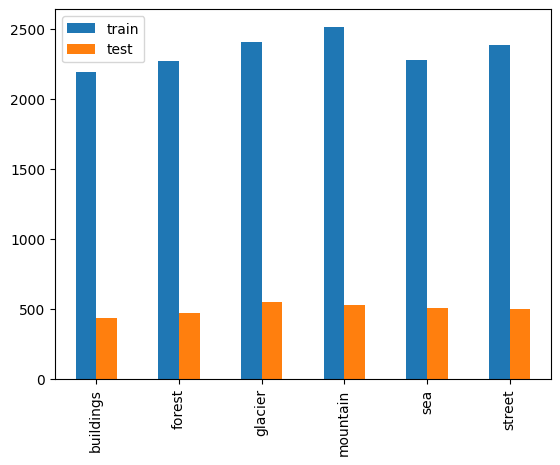

In [ ]:
_,train_counts = np.unique(train_labels, return_counts=True)
_,test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

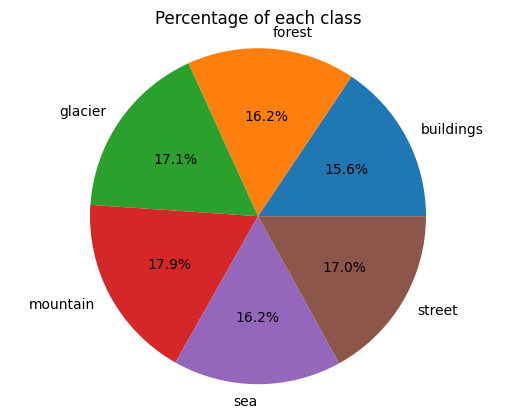

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of each class')
plt.show()

label is : 4


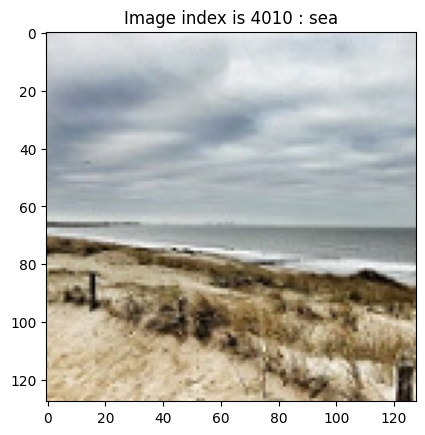

In [ ]:
i = np.random.randint(train_images.shape[0])
plt.imshow(tf.reshape(train_images[i],[128,128,3]))
plt.title('Image index is {} : '.format(i) + class_names[train_labels[i]])
print('label is :',train_labels[i])

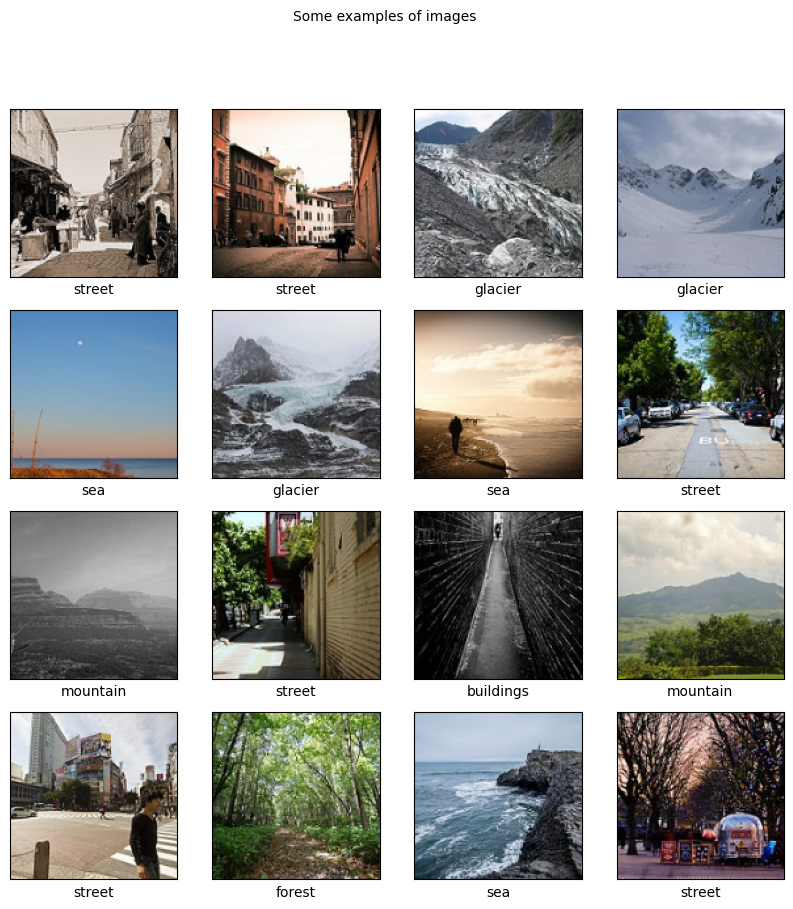

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images", fontsize=10)
for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i],cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
plt.show()

Model

In [ ]:
model = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,
        keras.layers.Dense(120,activation='relu') ,
        keras.layers.Dense(100,activation='relu') ,
        keras.layers.Dense(50,activation='relu') ,
        #keras.layers.Dropout(rate=0.5) ,
        keras.layers.Dense(6,activation='softmax') ,

        ])

In [ ]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(200, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    keras.layers.Conv2D(150, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(4,4)),
    keras.layers.Conv2D(120, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(80, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(50, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(4,4)),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    # keras.layers.Dropout(rate=0.5),  # Optional dropout layer
    keras.layers.Dense(6, activation='softmax')  # Assuming 6 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 200)     5600      
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 150)     270150    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 150)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 120)       162120    
                                                                 
 conv2d_8 (Conv2D)           (None, 27, 27, 80)        86480     
                                                                 
 conv2d_9 (Conv2D)           (None, 25, 25, 50)        36050     
                                                      

In [ ]:
import numpy as np

# Assuming you have already loaded your data into train_images, train_labels, test_images, and test_labels

# Use a subset of the data for quick training and evaluation
subset_size = 1000  # Adjust this number based on your available data and hardware capabilities

# Create subsets
train_images_subset = train_images[:subset_size]
train_labels_subset = train_labels[:subset_size]
test_images_subset = test_images[:subset_size]
test_labels_subset = test_labels[:subset_size]

# Compile the model (if not already compiled)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the subset
history = model.fit(train_images_subset, train_labels_subset, epochs=3, validation_data=(test_images_subset, test_labels_subset))

# Evaluate the model on the test subset
test_loss, test_accuracy = model.evaluate(test_images_subset, test_labels_subset)

print(f"Test Accuracy on subset: {test_accuracy}")


Epoch 1/3
32/32 [==============================] - 24s 352ms/step - loss: 1.7742 - accuracy: 0.1760 - val_loss: 1.6424 - val_accuracy: 0.3860
Epoch 2/3
32/32 [==============================] - 8s 239ms/step - loss: 1.3782 - accuracy: 0.4650 - val_loss: 1.0676 - val_accuracy: 0.6250
Epoch 3/3
32/32 [==============================] - 2s 48ms/step - loss: 1.5356 - accuracy: 0.4210
Test Accuracy on subset: 0.42100000381469727


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 200)     5600      
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 150)     270150    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 150)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 120)       162120    
                                                                 
 conv2d_8 (Conv2D)           (None, 27, 27, 80)        86480     
                                                                 
 conv2d_9 (Conv2D)           (None, 25, 25, 50)        36050     
                                                      

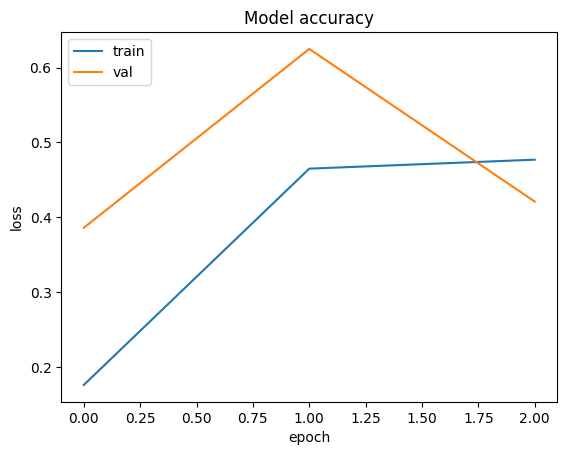

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


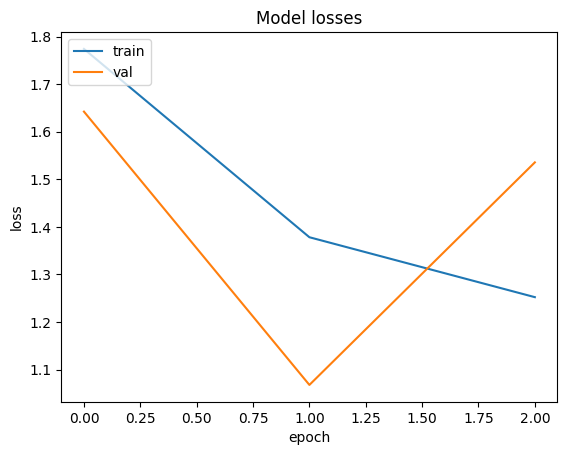

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model losses')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


In [ ]:
test_data = model.evaluate(test_images, test_labels)


94/94 [==============================] - 7s 69ms/step - loss: 1.2232 - accuracy: 0.5260


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics


In [ ]:


# Define batch size
batch_size = 1000

# Number of batches
num_batches = len(train_images) // batch_size

# Initialize arrays to hold predictions and true labels
all_predictions = []
all_true_labels = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size

    # Predict batch
    batch_predictions = model.predict(train_images[start_idx:end_idx])
    all_predictions.extend(np.argmax(batch_predictions, axis=1))
    all_true_labels.extend(train_labels[start_idx:end_idx])

# Convert lists to numpy arrays
all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)

# Generate classification report
print(
    f"Classification report for model {model}:\n"
    f"{metrics.classification_report(all_true_labels, all_predictions)}\n"
)


32/32 [==============================] - 2s 49ms/step
Classification report for model <keras.src.engine.sequential.Sequential object at 0x7805ab9abe50>:
              precision    recall  f1-score   support

           0       0.58      0.23      0.33      2187
           1       0.83      0.66      0.74      2265
           2       0.36      0.89      0.51      2399
           3       0.54      0.55      0.54      2508
           4       0.26      0.02      0.03      2268
           5       0.60      0.66      0.63      2373

    accuracy                           0.51     14000
   macro avg       0.53      0.50      0.46     14000
weighted avg       0.53      0.51      0.47     14000




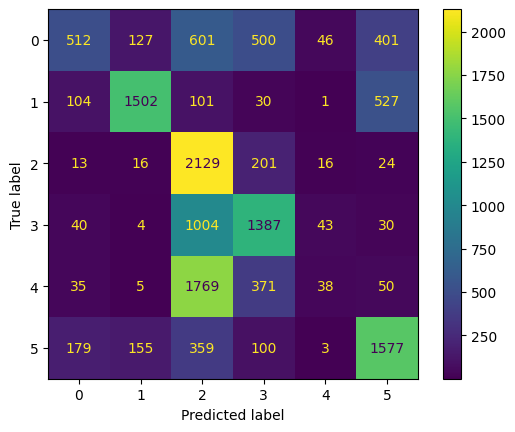

In [ ]:
ConfusionMatrixDisplay.from_predictions(all_true_labels, all_predictions)
plt.show()


32/32 [==============================] - 1s 46ms/step


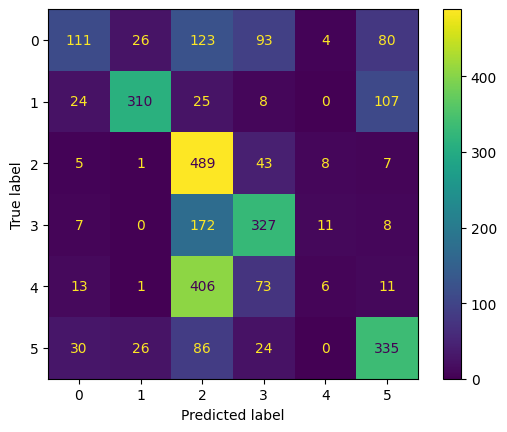

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define batch size
batch_size = 1000

# Number of batches
num_batches = len(test_images) // batch_size

# Initialize arrays to hold predictions and true labels
all_test_predictions = []
all_test_true_labels = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size

    # Predict batch
    batch_test_predictions = model.predict(test_images[start_idx:end_idx])
    all_test_predictions.extend(np.argmax(batch_test_predictions, axis=1))
    all_test_true_labels.extend(test_labels[start_idx:end_idx])

# If there are any remaining images that didn't fit into a batch
if len(test_images) % batch_size != 0:
    remaining_test_images = test_images[num_batches * batch_size:]
    remaining_test_labels = test_labels[num_batches * batch_size:]
    remaining_test_predictions = model.predict(remaining_test_images)
    all_test_predictions.extend(np.argmax(remaining_test_predictions, axis=1))
    all_test_true_labels.extend(remaining_test_labels)

# Convert lists to numpy arrays
all_test_predictions = np.array(all_test_predictions)
all_test_true_labels = np.array(all_test_true_labels)

# Calculate confusion matrix
cm = confusion_matrix(all_test_true_labels, all_test_predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


true_prediction is : 2
true_Class_name is : glacier


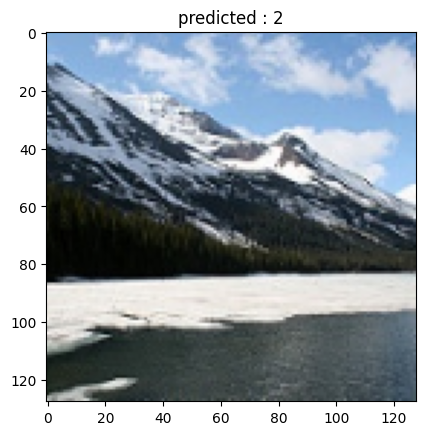

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly select an index from the test dataset
i = np.random.randint(len(all_test_predictions))

# Define a function to display the prediction for a single test image
def pretest(i):
    plt.imshow(test_images[i])
    plt.title('predicted : '+ str(all_test_predictions[i]))
    print('true_prediction is :', all_test_true_labels[i])
    # Assuming class_names is defined earlier
    print('true_Class_name is :', class_names[all_test_true_labels[i]])

# Call the function with the selected index
pretest(i)


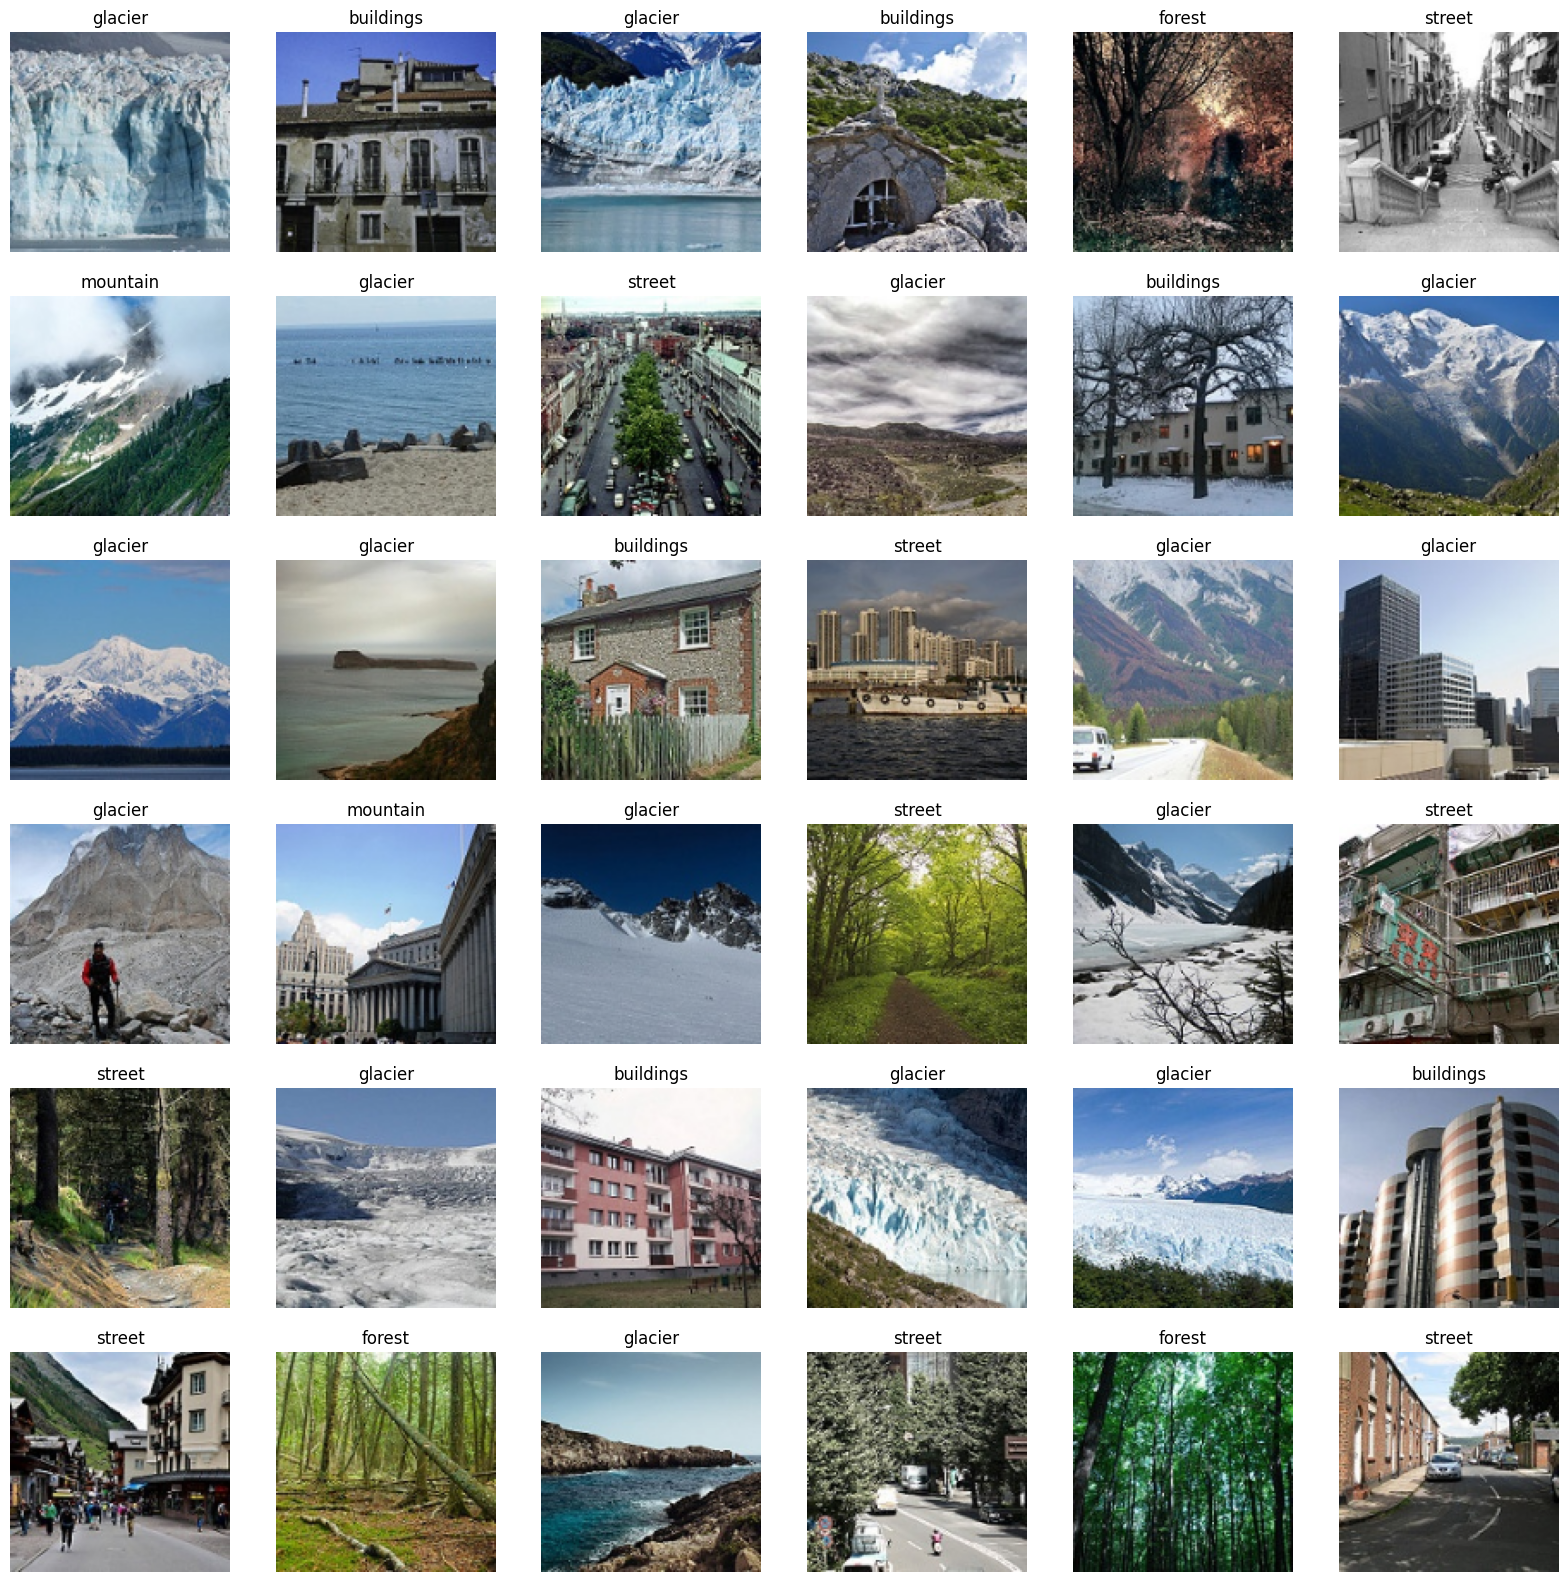

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of images to display
num_images = 36

# Randomly select indices from the test dataset
indices = np.random.randint(len(all_test_predictions), size=num_images)

# Create a grid of subplots
plt.figure(figsize=(20, 20))
for n, i in enumerate(indices):
    plt.subplot(6, 6, n + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
    plt.title(class_names[all_test_predictions[i]])  # Use predicted labels from batch processing

plt.show()


In [ ]:
seg_pred_path = '/content/seg_pred/seg_pred'
seg_pred_images = os.listdir(seg_pred_path)


In [ ]:
pred_array = [ ]

for img in os.listdir(seg_pred_path):
    img = cv2.imread(os.path.join(seg_pred_path,img))
    img = cv2.resize(img,(128,128))
    img = img.reshape(128,128,3)
    pred_array.append(img)

len(pred_array)


7301

In [ ]:
pred_array = np.array(pred_array)


In [ ]:
pred_array = pred_array / 255.0

In [ ]:
pred_array.shape

(7301, 128, 128, 3)